# Plotting embedding space of feature directions

This notebook...


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import umap
import umap.plot
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# python path hack for local imports
import sys

sys.path.append("..")

from models import (
    BottleneckT5Autoencoder,
    SparseAutoencoder,
    SpectrePretrainedConfig,
)
from models.feature_registry import load_spectre_features, FeatureSortCriteria

umap.plot.output_notebook()

/Users/thesephist/src/spectre/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/thesephist/src/spectre/venv/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Loading BokehJS ...

In [2]:
# Load the list of pre-labelled features for the "large" model variant.
sae_name = "lg-v6"
features = load_spectre_features(sae_name)
features[:10]

[SpectreFeature(#8101: Includes mathematical or programming syntax (confidence=0.92, density=0.0389)),
 SpectreFeature(#3008: Sentences with comma-separated clauses (confidence=0.64, density=0.0314)),
 SpectreFeature(#3113: Technical or specialized language (confidence=0.66, density=0.0298)),
 SpectreFeature(#476: Mathematical expressions with 'd' (confidence=0.34, density=0.0290)),
 SpectreFeature(#5135: Use of 'and' to link three or more items (confidence=0.91, density=0.0287)),
 SpectreFeature(#759: Scientific or mathematical content (confidence=0.68, density=0.0286)),
 SpectreFeature(#367: "For X" benefit or consequence structure (confidence=0.82, density=0.0281)),
 SpectreFeature(#2648: Technical and scientific text (confidence=0.66, density=0.0280)),
 SpectreFeature(#7821: Complex narratives with distinctive voice (confidence=0.75, density=0.0271)),
 SpectreFeature(#755: Mathematical expressions involving 'm' (confidence=0.90, density=0.0268))]

In [8]:
def plot(
    feature_vectors: torch.FloatTensor,
    labels: list[str] = None,
    interactive: bool = False,
):
    reducer = umap.UMAP(n_components=2)
    mapper = reducer.fit(feature_vectors.to("cpu"))

    if interactive:
        import pandas as pd

        umap.plot.show(
            umap.plot.interactive(
                mapper,
                hover_data=pd.DataFrame(
                    {
                        "text": np.array(labels),
                    }
                ),
                point_size=6,
                tools=["pan", "wheel_zoom", "box_zoom", "reset", "help"],
                alpha=0.75,
            )
        )
    else:
        umap.plot.diagnostic(mapper, diagnostic_type="pca")

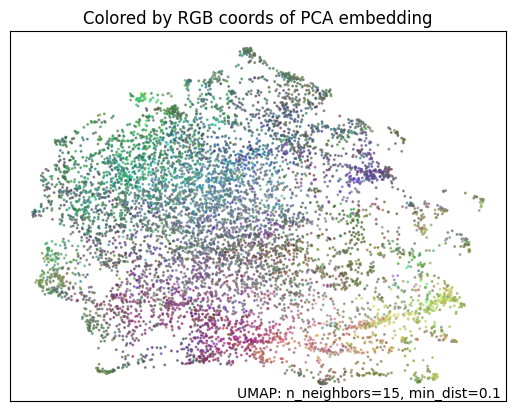

In [9]:
feature_vectors = torch.stack([f.vec for f in features])
feature_labels = [f.label for f in features]
plot(feature_vectors, feature_labels, interactive=False)

In [10]:
plot(feature_vectors, feature_labels, interactive=True)